In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("NewCar.csv")
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [3]:
x=df[['normalized-losses', 'wheel-base', 'length', 'width','height', 'curbweight', 'engine-size',
   'compression-ratio', 'horsepower', 'peak-rpm', 'citympg','highway-mpg']]
y=df['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print(l.intercept_)

-55929.830849012025


In [7]:
l.coef_

array([ 1.21484882e+01,  3.69908568e+01, -8.98516362e+00,  5.97541041e+02,
       -4.88437104e+01,  3.36187298e+00,  2.73411924e+01,  1.01426349e+03,
        5.69993030e+01,  4.81398373e-01,  1.79179653e+02, -1.82867248e+02])

In [8]:
coef=pd.DataFrame(data=l.coef_,index=[['normalized-losses', 'wheel-base', 'length', 'width','height', 'curbweight', 'engine-size',
   'compression-ratio', 'horsepower', 'peak-rpm', 'citympg','highway-mpg']],columns=["Coeff"])
coef

,Coeff
normalized-losses,12.148488
wheel-base,36.990857
length,-8.985164
width,597.541041
height,-48.843710
curbweight,3.361873
engine-size,27.341192
compression-ratio,1014.263490
horsepower,56.999303
peak-rpm,0.481398


In [9]:
prediction=l.predict(X_test)

In [10]:
prediction

array([21040.64952398, 17726.34265695, 17839.87363318, 11079.84989995,
       23023.50591182, 12309.56922916, 10614.72563752, 21477.82052299,
       19109.72200434,  8016.86740859, 25079.43889495,  8261.16469448,
       14100.70037476,  9214.50478628, 10591.54650876, 11501.50818929,
        1724.46620109, 10436.95417347, 10574.73714388, 10677.4702479 ,
       21522.52525698, 10051.06139551,  7056.8166934 ,  7128.08943832,
       19305.25961964, 22197.03014667, 10700.88005278, 10894.35083192,
       12220.39039547, 19157.33720865, 22340.92192519, 23706.07487432,
       25247.56454036, 22260.31413134,  7995.052769  , 19781.77456037,
        9626.15258938,  6679.48267015, 14114.14786666, 10253.59565781,
       16102.64207826, 17536.51204198,  7381.3725368 ,  9792.58174197,
        7309.29485494,  7851.02164362, 15771.50958216,  6246.2382748 ,
        6852.13156923, 10789.96187768,  6828.23098872, 14151.12846941,
        6949.99613612, 13190.09168657, 11640.17427121,  7382.18578425,
      

In [11]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

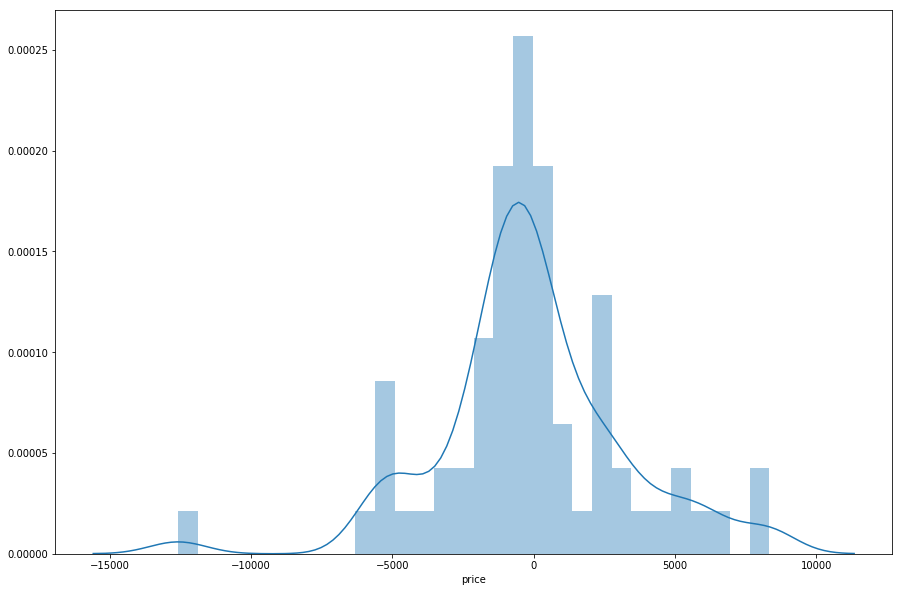

In [12]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [13]:
from sklearn import metrics

In [14]:
metrics.mean_absolute_error(y_test,prediction)

2374.0718293495615

In [15]:
metrics.mean_squared_error(y_test,prediction)

11423299.838827401

In [16]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

3379.837250346147

In [17]:
accuracy = l.score(X_test,y_test)

In [18]:
print(accuracy*100,'%')

74.50527384797445 %


In [19]:
metrics.r2_score(y_train,l.predict(X_train))

0.8232330901113206

In [20]:
metrics.r2_score(y_test,prediction)

0.7450527384797445

# Backward stepping

In [21]:
import statsmodels.formula.api as sm

In [22]:
ones=pd.DataFrame(np.ones((203,1)).astype(int))

In [23]:
x=pd.concat([ones,x],axis=1)

In [24]:
x.head()

,0,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg
0,1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27.0
1,1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27.0
2,1,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,19,26.0
3,1,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,24,30.0
4,1,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,18,22.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [26]:
r=sm.OLS(y_train,X_train).fit()

In [27]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     47.74
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           1.86e-40
Time:                        10:44:34   Log-Likelihood:                -1257.5
No. Observations:                 136   AIC:                             2541.
Df Residuals:                     123   BIC:                             2579.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
0                 -5.593e+04    1.5e+04     -3.726      0.000   -8.56e+04   -2.62e+04
normalized-losses    12.1485      7.970      1.524      0.130      -3.628      27.925
wheel-base           36.9909     94.863      0.390      0.697    -150.784     224.766
length               -8.9852     57.553     -0.156      0.876    -122.908     104.938
width               597.5410    252.137      2.370      0.019      98.452    1096.630
height              -48.8437    154.006     -0.317      0.752    -353.688     256.001
curbweight            3.3619      1.669      2.014      0.046       0.058       6.666
engine-size          27.3412     20.935      1.306      0.194     -14.098      68.780
compression-ratio  1014.2635    464.789      2.182      0.031      94.241    1934.286
horsepower           56.9993     20.651      2.760      0.007      16.121      97.878
peak-rpm              0.4814      0.726      0.663      0.508      -0.955       1.918
citympg             179.1797     98.105      1.826      0.070     -15.013     373.372
highway-mpg        -182.8672     96.102     -1.903      0.059    -373.095       7.360
==============================================================================
Omnibus:                       13.080   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.291
Skew:                           0.620   Prob(JB):                     0.000478
Kurtosis:                       4.078   Cond. No.                     3.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x1=X_train.drop(labels="length",axis=1)
x2=X_test.drop(labels="length",axis=1)

In [29]:
x1.head()

,0,normalized-losses,wheel-base,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg
42,1,121.803681,94.3,61.8,53.5,2337,111,8.5,78,4800,24,29.0
75,1,161.000000,93.7,64.4,50.8,1944,92,9.4,68,5500,31,38.0
150,1,74.000000,95.7,63.6,54.5,2015,92,9.0,62,4800,31,38.0
138,1,83.000000,93.3,63.8,55.7,2240,108,8.7,73,4400,26,31.0
51,1,104.000000,93.1,64.2,54.1,1905,91,9.0,68,5000,31,38.0


In [30]:
r=sm.OLS(y_train,x1).fit()

In [31]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     52.49
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           2.52e-41
Time:                        10:44:34   Log-Likelihood:                -1257.5
No. Observations:                 136   AIC:                             2539.
Df Residuals:                     124   BIC:                             2574.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
0                 -5.564e+04   1.48e+04     -3.750      0.000    -8.5e+04   -2.63e+04
normalized-losses    12.1266      7.938      1.528      0.129      -3.584      27.837
wheel-base           31.7454     88.364      0.359      0.720    -143.151     206.642
width               585.5031    239.111      2.449      0.016     112.236    1058.770
height              -56.5016    145.410     -0.389      0.698    -344.308     231.305
curbweight            3.3063      1.625      2.035      0.044       0.091       6.522
engine-size          27.6387     20.766      1.331      0.186     -13.462      68.740
compression-ratio   999.1694    452.830      2.206      0.029     102.891    1895.448
horsepower           56.6097     20.419      2.772      0.006      16.194      97.025
peak-rpm              0.4929      0.719      0.685      0.494      -0.930       1.916
citympg             179.1966     97.718      1.834      0.069     -14.215     372.608
highway-mpg        -179.9793     93.933     -1.916      0.058    -365.899       5.940
==============================================================================
Omnibus:                       13.171   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.420
Skew:                           0.623   Prob(JB):                     0.000448
Kurtosis:                       4.082   Cond. No.                     3.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
x1=x1.drop(labels="wheel-base",axis=1)
x2=x2.drop(labels="wheel-base",axis=1)
x1.head()

,0,normalized-losses,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg
42,1,121.803681,61.8,53.5,2337,111,8.5,78,4800,24,29.0
75,1,161.000000,64.4,50.8,1944,92,9.4,68,5500,31,38.0
150,1,74.000000,63.6,54.5,2015,92,9.0,62,4800,31,38.0
138,1,83.000000,63.8,55.7,2240,108,8.7,73,4400,26,31.0
51,1,104.000000,64.2,54.1,1905,91,9.0,68,5000,31,38.0


In [33]:
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     58.13
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           3.43e-42
Time:                        10:44:34   Log-Likelihood:                -1257.6
No. Observations:                 136   AIC:                             2537.
Df Residuals:                     125   BIC:                             2569.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
0                 -5.693e+04   1.43e+04     -3.970      0.000   -8.53e+04   -2.86e+04
normalized-losses    12.2264      7.905      1.547      0.124      -3.419      27.872
width               623.3092    213.959      2.913      0.004     199.857    1046.761
height              -29.2321    123.593     -0.237      0.813    -273.838     215.373
curbweight            3.5122      1.515      2.318      0.022       0.514       6.510
engine-size          27.3335     20.676      1.322      0.189     -13.586      68.253
compression-ratio   984.0573    449.299      2.190      0.030      94.839    1873.276
horsepower           55.8564     20.240      2.760      0.007      15.798      95.915
peak-rpm              0.5033      0.716      0.703      0.483      -0.914       1.920
citympg             179.9881     97.352      1.849      0.067     -12.684     372.661
highway-mpg        -176.4478     93.091     -1.895      0.060    -360.687       7.791
==============================================================================
Omnibus:                       13.787   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.258
Skew:                           0.645   Prob(JB):                     0.000295
Kurtosis:                       4.099   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
x1=x1.drop(labels="height",axis=1)
x2=x2.drop(labels="height",axis=1)
x1.head()

,0,normalized-losses,width,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg
42,1,121.803681,61.8,2337,111,8.5,78,4800,24,29.0
75,1,161.000000,64.4,1944,92,9.4,68,5500,31,38.0
150,1,74.000000,63.6,2015,92,9.0,62,4800,31,38.0
138,1,83.000000,63.8,2240,108,8.7,73,4400,26,31.0
51,1,104.000000,64.2,1905,91,9.0,68,5000,31,38.0


In [35]:
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     65.07
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           4.23e-43
Time:                        10:44:34   Log-Likelihood:                -1257.6
No. Observations:                 136   AIC:                             2535.
Df Residuals:                     126   BIC:                             2564.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
0                 -5.818e+04   1.33e+04     -4.376      0.000   -8.45e+04   -3.19e+04
normalized-losses    12.9496      7.263      1.783      0.077      -1.423      27.322
width               616.9289    211.455      2.918      0.004     198.465    1035.393
curbweight            3.3807      1.404      2.408      0.017       0.602       6.159
engine-size          28.7986     19.652      1.465      0.145     -10.092      67.689
compression-ratio   975.6112    446.197      2.187      0.031      92.601    1858.621
horsepower           57.0471     19.531      2.921      0.004      18.396      95.698
peak-rpm              0.5110      0.713      0.717      0.475      -0.899       1.921
citympg             190.4425     86.414      2.204      0.029      19.431     361.454
highway-mpg        -182.8520     88.732     -2.061      0.041    -358.450      -7.254
==============================================================================
Omnibus:                       13.289   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.552
Skew:                           0.628   Prob(JB):                     0.000420
Kurtosis:                       4.081   Cond. No.                     3.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#after this rsquare decreases

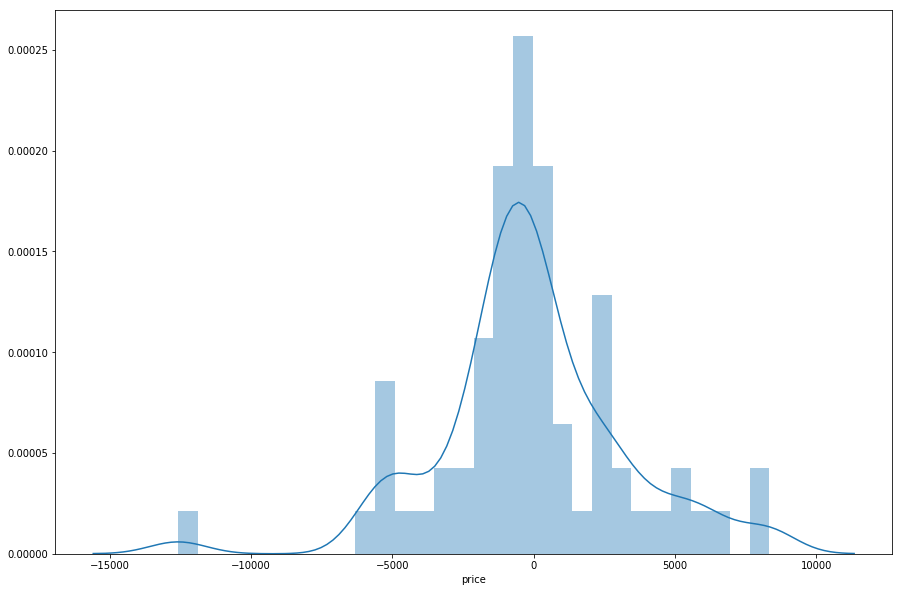

In [36]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [37]:
pred=r.predict(x2)

In [38]:
pred.head()

15     21185.212387
9      17665.048979
115    17805.539653
78     10973.110047
66     23058.876281
dtype: float64

In [39]:
metrics.r2_score(y_train,r.predict(x1))

0.8229348295384293

In [40]:
metrics.r2_score(y_test,pred)

0.7489598300859722

# Using Categorical colums too

In [41]:
df.columns

Index(['normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curbweight', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'compression-ratio', 'horsepower', 'peak-rpm', 'citympg',
       'highway-mpg', 'price'],
      dtype='object')

In [42]:
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [43]:
fuel=pd.get_dummies(df['fuel-type'],drop_first=True)

In [44]:
fuel.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [45]:
asp=pd.get_dummies(df['aspiration'],drop_first=True)
doors=pd.get_dummies(df['num-of-doors'],drop_first=True)
style=pd.get_dummies(df['body-style'],drop_first=True)
enginel=pd.get_dummies(df['engine-location'],drop_first=True)
ncylinder=pd.get_dummies(df['num-of-cylinders'],drop_first=True)
fuelsys=pd.get_dummies(df['fuel-system'])

In [46]:
fuelsys.drop(labels="spfi",axis=1,inplace=True)
fuelsys.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [47]:
price=df["price"]

In [48]:
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [49]:
df.drop(["fuel-type","aspiration","num-of-doors","body-style","engine-location","num-of-cylinders","fuel-system","price"],axis=1,inplace=True)

In [50]:
df.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27.0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27.0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,19,26.0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,24,30.0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,18,22.0


In [51]:
df=pd.concat([df,fuel,asp,doors,style,enginel,ncylinder,fuelsys],axis=1)
df.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,0,1,0


In [52]:
#df1=pd.concat([df, pd.DataFrame(price)], axis=1)
#df1.to_csv("CategoriacalCar.csv")
#del df1

In [53]:
x=df
y=price
x.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,0,1,0


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
l.intercept_

-31556.260986011195

In [57]:
coef=pd.DataFrame(l.coef_,index=x.columns,columns=['coeff'])

In [58]:
coef

,coeff
normalized-losses,1.164955e+01
wheel-base,1.837964e+02
length,-3.865198e+01
width,2.916164e+02
height,-8.303580e+01
curbweight,4.374503e+00
engine-size,7.016406e+00
compression-ratio,4.357942e+02
horsepower,4.274137e+01
peak-rpm,3.118603e-02


In [59]:
prediction=l.predict(X_test)

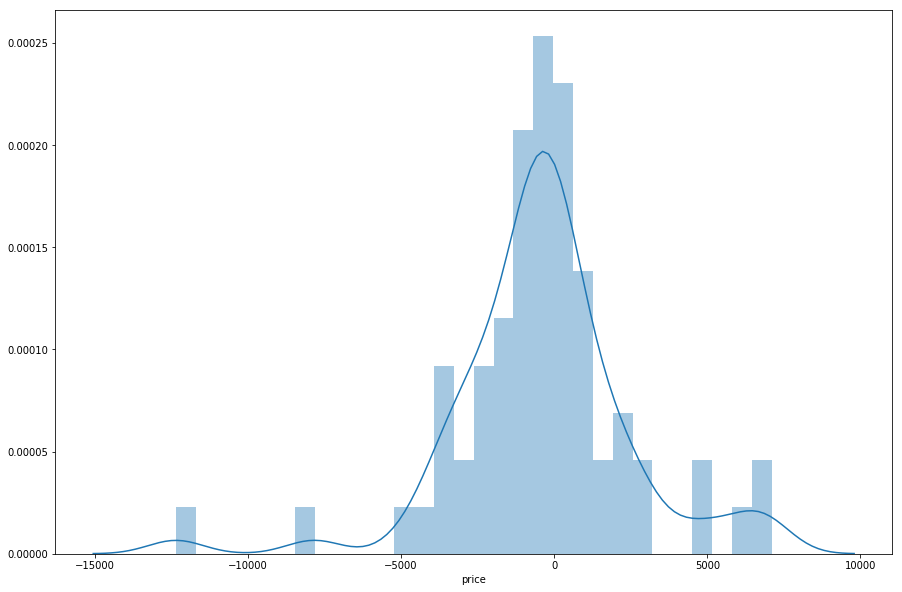

In [60]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [61]:
metrics.mean_absolute_error(y_test,prediction)

2005.7109832640215

In [62]:
metrics.mean_squared_error(y_test,prediction)

8908620.5354108

In [63]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2984.7312333626955

In [64]:
metrics.r2_score(y_train,l.predict(X_train))

0.8812519379659843

In [65]:
metrics.r2_score(y_test,prediction)

0.8011758037107397

In [66]:
accuracy = l.score(X_test,y_test)
print(accuracy*100,'%')

80.11758037107396 %


# Backward Elemination

In [67]:
x.tail()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
198,95.0,109.1,188.8,68.9,55.5,2952,141,9.5,114,5400,...,0,0,0,0,0,0,0,0,1,0
199,95.0,109.1,188.8,68.8,55.5,3049,141,8.7,160,5300,...,0,0,0,0,0,0,0,0,1,0
200,95.0,109.1,188.8,68.9,55.5,3012,173,8.8,134,5500,...,0,0,0,0,0,0,0,0,1,0
201,95.0,109.1,188.8,68.9,55.5,3217,145,10.1,106,4800,...,0,0,0,0,0,0,1,0,0,0
202,95.0,109.1,188.8,68.9,55.5,3062,141,9.5,114,5400,...,0,0,0,0,0,0,0,0,1,0


In [68]:
import statsmodels.formula.api as sm

In [69]:
ones=pd.DataFrame(data=np.ones((203,1)).astype(int),columns=["one"])
ones.head()

,one
0,1
1,1
2,1
3,1
4,1


In [70]:
x=pd.concat([ones,x],axis=1)
x.head()

,one,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,...,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,...,0,0,0,0,0,0,0,0,1,0
1,1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,...,0,0,0,0,0,0,0,0,1,0
2,1,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,...,0,0,0,0,0,0,0,0,1,0
3,1,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,...,0,0,0,0,0,0,0,0,1,0
4,1,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,...,0,0,0,0,0,0,0,0,1,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [72]:
r=sm.OLS(y_train,X_train).fit()

In [73]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     25.97
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           4.02e-36
Time:                        10:44:40   Log-Likelihood:                -1230.5
No. Observations:                 136   AIC:                             2523.
Df Residuals:                     105   BIC:                             2613.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.051e+04   1.16e+04     -1.770      0.080   -4.35e+04    2472.270
normalized-losses    11.6496      8.742      1.333      0.186      -5.684      28.984
wheel-base          183.7964     94.856      1.938      0.055      -4.286     371.879
length              -38.6520     58.494     -0.661      0.510    -154.635      77.332
width               291.6164    282.628      1.032      0.305    -268.783     852.016
height              -83.0358    167.835     -0.495      0.622    -415.822     249.751
curbweight            4.3745      1.792      2.442      0.016       0.822       7.927
engine-size           7.0164     29.952      0.234      0.815     -52.373      66.406
compression-ratio   435.7942    593.994      0.734      0.465    -741.986    1613.575
horsepower           42.7414     28.090      1.522      0.131     -12.957      98.439
peak-rpm              0.0312      0.915      0.034      0.973      -1.783       1.846
citympg              86.2287    129.757      0.665      0.508    -171.056     343.513
highway-mpg          -5.2647    127.584     -0.041      0.967    -258.241     247.712
gas               -8970.5904   5264.906     -1.704      0.091   -1.94e+04    1468.745
turbo              1253.7401   1111.825      1.128      0.262    -950.803    3458.283
two                -188.4338    785.439     -0.240      0.811   -1745.814    1368.946
hardtop           -4525.4077   2257.251     -2.005      0.048   -9001.119     -49.696
hatchback         -3732.2719   1675.852     -2.227      0.028   -7055.177    -409.366
sedan             -2946.1913   1863.880     -1.581      0.117   -6641.921     749.538
wagon             -4470.5340   2024.184     -2.209      0.029   -8484.116    -456.952
rear               1.231e+04   3353.208      3.672      0.000    5663.798     1.9e+04
five              -1176.7368   2330.596     -0.505      0.615   -5797.878    3444.404
four              -4143.2834   2109.308     -1.964      0.052   -8325.651      39.084
six               -2886.1831   1954.303     -1.477      0.143   -6761.206     988.840
three              -2.87e-12   1.19e-12     -2.409      0.018   -5.23e-12   -5.08e-13
twelve             -783.6186   3626.319     -0.216      0.829   -7973.940    6406.703
two               -2006.9416   4120.780     -0.487      0.627   -1.02e+04    6163.804
1bbl              -1422.1705   1582.398     -0.899      0.371   -4559.773    1715.432
2bbl              -1565.7621   1267.066     -1.236      0.219   -4078.119     946.595
4bbl                255.7547   3138.061      0.082      0.935   -5966.440    6477.950
idi               -1.154e+04   6449.427     -1.789      0.076   -2.43e+04    1247.042
mfi               -3055.2652   2315.960     -1.319      0.190   -7647.386    1536.855
mpfi               -296.6083   1351.768     -0.219      0.827   -2976.914

In [74]:
x1=X_train.drop(labels="peak-rpm",axis=1)
x2=X_test.drop(labels="peak-rpm",axis=1)

In [75]:
x1.head()

,one,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,...,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
42,1,121.803681,94.3,170.7,61.8,53.5,2337,111,8.5,78,...,0,0,0,0,1,0,0,0,0,0
75,1,161.000000,93.7,157.3,64.4,50.8,1944,92,9.4,68,...,0,0,0,0,1,0,0,0,0,0
150,1,74.000000,95.7,158.7,63.6,54.5,2015,92,9.0,62,...,0,0,0,0,1,0,0,0,0,0
138,1,83.000000,93.3,157.3,63.8,55.7,2240,108,8.7,73,...,0,0,0,0,1,0,0,0,0,0
51,1,104.000000,93.1,159.1,64.2,54.1,1905,91,9.0,68,...,0,0,0,0,1,0,0,0,0,0


In [76]:
r=sm.OLS(y_train,x1).fit()

In [77]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     27.13
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           7.64e-37
Time:                        10:44:40   Log-Likelihood:                -1230.5
No. Observations:                 136   AIC:                             2521.
Df Residuals:                     106   BIC:                             2608.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.047e+04   1.15e+04     -1.786      0.077   -4.32e+04    2253.740
normalized-losses    11.7263      8.407      1.395      0.166      -4.941      28.394
wheel-base          184.0126     94.197      1.953      0.053      -2.742     370.767
length              -38.8690     57.872     -0.672      0.503    -153.606      75.868
width               292.8874    278.834      1.050      0.296    -259.928     845.703
height              -83.5783    166.290     -0.503      0.616    -413.264     246.108
curbweight            4.3716      1.781      2.454      0.016       0.840       7.903
engine-size           6.5489     26.501      0.247      0.805     -45.992      59.090
compression-ratio   441.7204    565.292      0.781      0.436    -679.027    1562.467
horsepower           43.1860     24.760      1.744      0.084      -5.903      92.275
citympg              86.4375    129.001      0.670      0.504    -169.319     342.194
highway-mpg          -5.3500    126.957     -0.042      0.966    -257.056     246.356
gas               -8941.0595   5168.593     -1.730      0.087   -1.92e+04    1306.179
turbo              1245.8866   1082.547      1.151      0.252    -900.368    3392.141
two                -186.9707    780.561     -0.240      0.811   -1734.509    1360.567
hardtop           -4530.2813   2242.078     -2.021      0.046   -8975.419     -85.144
hatchback         -3729.7008   1666.247     -2.238      0.027   -7033.198    -426.204
sedan             -2939.9915   1846.221     -1.592      0.114   -6600.305     720.322
wagon             -4460.5120   1993.253     -2.238      0.027   -8412.330    -508.694
rear               1.234e+04   3203.748      3.853      0.000    5992.862    1.87e+04
five              -1169.6759   2310.407     -0.506      0.614   -5750.282    3410.930
four              -4146.1944   2097.624     -1.977      0.051   -8304.939      12.550
six               -2889.2188   1943.053     -1.487      0.140   -6741.510     963.072
three             -3.357e-12   2.36e-12     -1.424      0.157   -8.03e-12    1.32e-12
twelve             -793.1184   3598.516     -0.220      0.826   -7927.527    6341.290
two               -2042.7067   3966.107     -0.515      0.608   -9905.899    5820.486
1bbl              -1400.5153   1442.389     -0.971      0.334   -4260.191    1459.161
2bbl              -1569.1438   1257.209     -1.248      0.215   -4061.683     923.396
4bbl                250.1616   3118.967      0.080      0.936   -5933.494    6433.817
idi               -1.152e+04   6401.720     -1.800      0.075   -2.42e+04    1167.156
mfi               -3048.7106   2297.061     -1.327      0.187   -7602.858    1505.437
mpfi               -296.7283   1345.379     -0.221      0.826   -2964.073    2370.617
spdi              -2876.1230   1316.277     -2.185      0.031   -5485.771

In [78]:
x1=x1.drop(labels="highway-mpg",axis=1)
x2=x2.drop(labels="highway-mpg",axis=1)
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     28.36
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           1.42e-37
Time:                        10:44:41   Log-Likelihood:                -1230.5
No. Observations:                 136   AIC:                             2519.
Df Residuals:                     107   BIC:                             2603.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.045e+04   1.14e+04     -1.794      0.076   -4.31e+04    2149.033
normalized-losses    11.6865      8.315      1.406      0.163      -4.797      28.170
wheel-base          184.0088     93.756      1.963      0.052      -1.852     369.870
length              -38.3702     56.384     -0.681      0.498    -150.145      73.405
width               291.4821    275.538      1.058      0.292    -254.740     837.704
height              -85.1522    161.283     -0.528      0.599    -404.877     234.573
curbweight            4.3885      1.727      2.541      0.012       0.965       7.812
engine-size           6.7750     25.831      0.262      0.794     -44.432      57.982
compression-ratio   439.0511    559.106      0.785      0.434    -669.311    1547.413
horsepower           42.7048     21.866      1.953      0.053      -0.643      86.053
citympg              82.5331     89.339      0.924      0.358     -94.570     259.636
gas               -8922.9763   5126.666     -1.741      0.085   -1.91e+04    1240.041
turbo              1265.4631    973.228      1.300      0.196    -663.848    3194.774
two                -179.5576    756.924     -0.237      0.813   -1680.071    1320.956
hardtop           -4526.8393   2230.114     -2.030      0.045   -8947.780    -105.899
hatchback         -3719.6088   1641.237     -2.266      0.025   -6973.170    -466.048
sedan             -2929.2009   1819.829     -1.610      0.110   -6536.799     678.397
wagon             -4444.1311   1945.840     -2.284      0.024   -8301.533    -586.729
rear               1.235e+04   3184.205      3.879      0.000    6039.511    1.87e+04
five              -1184.1480   2274.057     -0.521      0.604   -5692.202    3323.906
four              -4168.6033   2019.613     -2.064      0.041   -8172.251    -164.955
six               -2904.6818   1899.168     -1.529      0.129   -6669.562     860.198
three              1.146e-12   9.59e-13      1.195      0.235   -7.56e-13    3.05e-12
twelve             -813.2657   3549.938     -0.229      0.819   -7850.604    6224.073
two               -2017.4435   3902.205     -0.517      0.606   -9753.110    5718.223
1bbl              -1392.8527   1424.191     -0.978      0.330   -4216.145    1430.440
2bbl              -1571.5500   1250.040     -1.257      0.211   -4049.608     906.508
4bbl                263.9807   3087.178      0.086      0.932   -5855.989    6383.951
idi               -1.153e+04   6371.444     -1.809      0.073   -2.42e+04    1102.964
mfi               -3052.2652   2284.779     -1.336      0.184   -7581.574    1477.043
mpfi               -287.6905   1321.964     -0.218      0.828   -2908.331    2332.950
spdi              -2882.5986   1301.164     -2.215      0.029   -5462.005    -303.192
=========================================================================

In [79]:
x1=x1.drop(labels="4bbl",axis=1)
x2=x2.drop(labels="4bbl",axis=1)
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     28.36
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           1.42e-37
Time:                        10:44:41   Log-Likelihood:                -1230.5
No. Observations:                 136   AIC:                             2519.
Df Residuals:                     107   BIC:                             2603.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.036e+04   1.18e+04     -1.721      0.088   -4.38e+04    3093.291
normalized-losses    11.6865      8.315      1.406      0.163      -4.797      28.170
wheel-base          184.0088     93.756      1.963      0.052      -1.852     369.870
length              -38.3702     56.384     -0.681      0.498    -150.145      73.405
width               291.4821    275.538      1.058      0.292    -254.740     837.704
height              -85.1522    161.283     -0.528      0.599    -404.877     234.573
curbweight            4.3885      1.727      2.541      0.012       0.965       7.812
engine-size           6.7750     25.831      0.262      0.794     -44.432      57.982
compression-ratio   439.0511    559.106      0.785      0.434    -669.311    1547.413
horsepower           42.7048     21.866      1.953      0.053      -0.643      86.053
citympg              82.5331     89.339      0.924      0.358     -94.570     259.636
gas               -8746.9892   6284.191     -1.392      0.167   -2.12e+04    3710.686
turbo              1265.4631    973.228      1.300      0.196    -663.848    3194.774
two                -179.5576    756.924     -0.237      0.813   -1680.071    1320.956
hardtop           -4526.8393   2230.114     -2.030      0.045   -8947.780    -105.899
hatchback         -3719.6088   1641.237     -2.266      0.025   -6973.170    -466.048
sedan             -2929.2009   1819.829     -1.610      0.110   -6536.799     678.397
wagon             -4444.1311   1945.840     -2.284      0.024   -8301.533    -586.729
rear               1.235e+04   3184.205      3.879      0.000    6039.511    1.87e+04
five              -1184.1480   2274.057     -0.521      0.604   -5692.202    3323.906
four              -4168.6033   2019.613     -2.064      0.041   -8172.251    -164.955
six               -2904.6818   1899.168     -1.529      0.129   -6669.562     860.198
three              -2.58e-12   1.72e-12     -1.502      0.136   -5.99e-12    8.26e-13
twelve             -813.2657   3549.938     -0.229      0.819   -7850.604    6224.073
two               -2017.4435   3902.205     -0.517      0.606   -9753.110    5718.223
1bbl              -1656.8334   3497.374     -0.474      0.637   -8589.970    5276.303
2bbl              -1835.5307   3373.962     -0.544      0.588   -8524.017    4852.956
idi               -1.162e+04   6096.271     -1.905      0.059   -2.37e+04     469.471
mfi               -3316.2458   4241.362     -0.782      0.436   -1.17e+04    5091.760
mpfi               -551.6712   3287.680     -0.168      0.867   -7069.114    5965.771
spdi              -3146.5793   3618.624     -0.870      0.386   -1.03e+04    4026.920
==============================================================================
Omnibus:                       12.963   Durbin-Watson:                   2.045
P

In [80]:
x1=x1.drop(labels="mpfi",axis=1)
x2=x2.drop(labels="mpfi",axis=1)
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           2.60e-38
Time:                        10:44:41   Log-Likelihood:                -1230.5
No. Observations:                 136   AIC:                             2517.
Df Residuals:                     108   BIC:                             2598.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.059e+04   1.17e+04     -1.759      0.081   -4.38e+04    2610.501
normalized-losses    11.6930      8.277      1.413      0.161      -4.714      28.100
wheel-base          184.2218     93.325      1.974      0.051      -0.765     369.208
length              -38.1468     56.114     -0.680      0.498    -149.375      73.081
width               292.5494    274.222      1.067      0.288    -251.007     836.106
height              -85.3096    160.553     -0.531      0.596    -403.554     232.935
curbweight            4.3810      1.718      2.549      0.012       0.975       7.787
engine-size           6.5541     25.681      0.255      0.799     -44.350      57.458
compression-ratio   437.5215    556.510      0.786      0.433    -665.579    1540.622
horsepower           42.8338     21.754      1.969      0.052      -0.287      85.955
citympg              82.5878     88.935      0.929      0.355     -93.697     258.873
gas               -9139.2886   5806.813     -1.574      0.118   -2.06e+04    2370.821
turbo              1261.5965    968.568      1.303      0.196    -658.273    3181.466
two                -179.7751    753.509     -0.239      0.812   -1673.361    1313.811
hardtop           -4531.6086   2219.877     -2.041      0.044   -8931.790    -131.427
hatchback         -3727.0434   1633.241     -2.282      0.024   -6964.410    -489.677
sedan             -2938.0681   1810.858     -1.622      0.108   -6527.504     651.367
wagon             -4451.7849   1936.533     -2.299      0.023   -8290.330    -613.240
rear               1.236e+04   3169.772      3.898      0.000    6072.442    1.86e+04
five              -1192.2547   2263.292     -0.527      0.599   -5678.492    3293.982
four              -4173.6330   2010.285     -2.076      0.040   -8158.366    -188.900
six               -2902.2626   1890.550     -1.535      0.128   -6649.660     845.135
three             -9.522e-13   1.06e-12     -0.896      0.372   -3.06e-12    1.15e-12
twelve             -803.7475   3533.479     -0.227      0.820   -7807.716    6200.221
two               -1744.3222   3530.542     -0.494      0.622   -8742.470    5253.825
1bbl              -1103.8383   1165.551     -0.947      0.346   -3414.163    1206.486
2bbl              -1282.5555    720.354     -1.780      0.078   -2710.422     145.311
idi               -1.145e+04   5986.705     -1.912      0.058   -2.33e+04     418.682
mfi               -2758.3012   2621.201     -1.052      0.295   -7953.976    2437.374
spdi              -2591.4290   1459.281     -1.776      0.079   -5483.977     301.119
==============================================================================
Omnibus:                       12.965   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.185
Skew:   

In [81]:
x1=x1.drop(labels="twelve",axis=1)
x2=x2.drop(labels="twelve",axis=1)
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     31.08
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           4.72e-39
Time:                        10:44:41   Log-Likelihood:                -1230.5
No. Observations:                 136   AIC:                             2515.
Df Residuals:                     109   BIC:                             2594.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.125e+04   1.13e+04     -1.882      0.063   -4.36e+04    1130.142
normalized-losses    12.2066      7.929      1.540      0.127      -3.508      27.921
wheel-base          186.1662     92.528      2.012      0.047       2.779     369.553
length              -37.8682     55.856     -0.678      0.499    -148.573      72.837
width               298.7221    271.687      1.100      0.274    -239.752     837.197
height              -71.8174    148.544     -0.483      0.630    -366.227     222.593
curbweight            4.2836      1.657      2.585      0.011       1.000       7.568
engine-size           6.6330     25.567      0.259      0.796     -44.040      57.306
compression-ratio   390.6290    514.666      0.759      0.449    -629.422    1410.680
horsepower           43.7607     21.276      2.057      0.042       1.592      85.929
citympg              87.6894     85.685      1.023      0.308     -82.136     257.515
gas               -9491.7591   5571.850     -1.704      0.091   -2.05e+04    1551.466
turbo              1243.6297    961.133      1.294      0.198    -661.305    3148.565
two                -220.0991    729.167     -0.302      0.763   -1665.284    1225.086
hardtop           -4571.5564   2203.272     -2.075      0.040   -8938.370    -204.742
hatchback         -3878.9327   1484.003     -2.614      0.010   -6820.179    -937.686
sedan             -3129.3040   1596.877     -1.960      0.053   -6294.262      35.654
wagon             -4643.4382   1736.033     -2.675      0.009   -8084.199   -1202.677
rear                1.23e+04   3145.323      3.909      0.000    6062.422    1.85e+04
five              -1034.6347   2145.213     -0.482      0.631   -5286.378    3217.109
four              -3985.6766   1824.623     -2.184      0.031   -7602.019    -369.334
six               -2683.0570   1619.406     -1.657      0.100   -5892.668     526.554
three              2.871e-12   7.49e-13      3.836      0.000    1.39e-12    4.35e-12
two               -1474.8168   3311.302     -0.445      0.657   -8037.709    5088.075
1bbl              -1082.2367   1156.612     -0.936      0.351   -3374.603    1210.130
2bbl              -1272.6649    715.906     -1.778      0.078   -2691.567     146.238
idi               -1.175e+04   5807.945     -2.024      0.045   -2.33e+04    -243.075
mfi               -2738.7875   2608.376     -1.050      0.296   -7908.505    2430.930
spdi              -2577.0077   1451.547     -1.775      0.079   -5453.927     299.912
==============================================================================
Omnibus:                       13.133   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.546
Skew:                           0.552   Prob(JB):                     0.000155
Kurtosis:      

In [82]:
x1=x1.drop(labels="two",axis=1)
x2=x2.drop(labels="two",axis=1)
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     34.19
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           1.57e-40
Time:                        10:44:41   Log-Likelihood:                -1230.7
No. Observations:                 136   AIC:                             2511.
Df Residuals:                     111   BIC:                             2584.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.158e+04   1.12e+04     -1.931      0.056   -4.37e+04     564.217
normalized-losses    11.2211      7.404      1.515      0.132      -3.451      25.894
wheel-base          187.7554     91.607      2.050      0.043       6.230     369.281
length              -40.1909     54.453     -0.738      0.462    -148.093      67.711
width               306.9772    268.657      1.143      0.256    -225.385     839.339
height              -67.7554    146.219     -0.463      0.644    -357.499     221.988
curbweight            4.1383      1.597      2.591      0.011       0.973       7.303
engine-size           9.8049     23.822      0.412      0.681     -37.400      57.009
compression-ratio   346.1869    503.516      0.688      0.493    -651.564    1343.938
horsepower           45.2357     20.298      2.229      0.028       5.013      85.458
citympg              76.6787     82.442      0.930      0.354     -86.685     240.042
gas               -9789.0357   5492.138     -1.782      0.077   -2.07e+04    1094.001
turbo              1149.0341    932.243      1.233      0.220    -698.267    2996.335
hardtop           -4550.3039   2185.271     -2.082      0.040   -8880.565    -220.043
hatchback         -3895.3435   1469.330     -2.651      0.009   -6806.918    -983.769
sedan             -2979.3736   1511.919     -1.971      0.051   -5975.342      16.595
wagon             -4497.5944   1663.167     -2.704      0.008   -7793.271   -1201.917
rear               1.208e+04   3069.269      3.935      0.000    5995.171    1.82e+04
five               -516.1120   1857.750     -0.278      0.782   -4197.368    3165.144
four              -3422.9904   1377.032     -2.486      0.014   -6151.672    -694.309
six               -2314.0221   1445.232     -1.601      0.112   -5177.847     549.802
three              4.156e-12   9.21e-13      4.512      0.000    2.33e-12    5.98e-12
1bbl              -1032.7013   1136.802     -0.908      0.366   -3285.350    1219.948
2bbl              -1169.4023    674.242     -1.734      0.086   -2505.457     166.652
idi               -1.179e+04   5759.993     -2.047      0.043   -2.32e+04    -376.820
mfi               -2895.8606   2569.154     -1.127      0.262   -7986.810    2195.089
spdi              -2644.5858   1434.305     -1.844      0.068   -5486.756     197.585
==============================================================================
Omnibus:                       12.872   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.068
Skew:                           0.545   Prob(JB):                     0.000197
Kurtosis:                       4.351   Cond. No.                     1.02e+16
==============================================================================

Warnings:
[1] Standard Error

In [83]:
x1=x1.drop(labels="five",axis=1)
x2=x2.drop(labels="five",axis=1)
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     35.97
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           2.69e-41
Time:                        10:44:41   Log-Likelihood:                -1230.7
No. Observations:                 136   AIC:                             2509.
Df Residuals:                     112   BIC:                             2579.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.138e+04   1.11e+04     -1.925      0.057   -4.34e+04     622.109
normalized-losses    10.9959      7.330      1.500      0.136      -3.527      25.519
wheel-base          188.5496     91.184      2.068      0.041       7.880     369.220
length              -41.1342     54.123     -0.760      0.449    -148.371      66.103
width               290.1369    260.649      1.113      0.268    -226.305     806.579
height              -70.8826    145.183     -0.488      0.626    -358.545     216.780
curbweight            4.2887      1.497      2.866      0.005       1.324       7.254
engine-size          10.3427     23.645      0.437      0.663     -36.507      57.192
compression-ratio   369.4835    494.435      0.747      0.456    -610.176    1349.143
horsepower           45.4216     20.204      2.248      0.027       5.391      85.453
citympg              82.4653     79.438      1.038      0.301     -74.930     239.861
gas               -9652.9442   5447.665     -1.772      0.079   -2.04e+04    1140.906
turbo              1142.2112    928.072      1.231      0.221    -696.644    2981.067
hardtop           -4478.9779   2161.178     -2.072      0.041   -8761.076    -196.880
hatchback         -3883.7565   1462.674     -2.655      0.009   -6781.858    -985.655
sedan             -2979.7924   1505.677     -1.979      0.050   -5963.098       3.513
wagon             -4524.1503   1653.563     -2.736      0.007   -7800.474   -1247.826
rear                 1.2e+04   3042.646      3.943      0.000    5967.141     1.8e+04
four              -3177.1799   1050.799     -3.024      0.003   -5259.203   -1095.157
six               -2134.5065   1287.398     -1.658      0.100   -4685.321     416.308
three             -1.032e-12   6.34e-13     -1.627      0.107   -2.29e-12    2.25e-13
1bbl              -1037.0980   1131.999     -0.916      0.362   -3280.009    1205.813
2bbl              -1162.4115    670.990     -1.732      0.086   -2491.893     167.070
idi               -1.173e+04   5732.323     -2.047      0.043   -2.31e+04    -373.832
mfi               -2902.4989   2558.437     -1.134      0.259   -7971.714    2166.716
spdi              -2628.3053   1427.191     -1.842      0.068   -5456.101     199.490
==============================================================================
Omnibus:                       12.852   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.011
Skew:                           0.545   Prob(JB):                     0.000202
Kurtosis:                       4.347   Cond. No.                     5.03e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smal

In [84]:
x1=x1.drop(labels="engine-size",axis=1)
x2=x2.drop(labels="engine-size",axis=1)
r=sm.OLS(y_train,x1).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     37.87
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           4.72e-42
Time:                        10:44:42   Log-Likelihood:                -1230.8
No. Observations:                 136   AIC:                             2508.
Df Residuals:                     113   BIC:                             2575.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
one               -2.202e+04    1.1e+04     -2.007      0.047   -4.38e+04    -287.197
normalized-losses    10.7965      7.289      1.481      0.141      -3.645      25.238
wheel-base          186.7121     90.761      2.057      0.042       6.898     366.526
length              -40.5445     53.912     -0.752      0.454    -147.354      66.265
width               318.5390    251.527      1.266      0.208    -179.781     816.859
height              -79.2446    143.404     -0.553      0.582    -363.353     204.864
curbweight            4.6188      1.288      3.587      0.000       2.068       7.170
compression-ratio   334.4476    486.155      0.688      0.493    -628.713    1297.608
horsepower           49.7309     17.576      2.830      0.006      14.910      84.551
citympg              86.7850     78.539      1.105      0.272     -68.815     242.385
gas               -1.009e+04   5335.184     -1.892      0.061   -2.07e+04     477.921
turbo               939.2992    800.937      1.173      0.243    -647.502    2526.100
hardtop           -4425.3684   2149.966     -2.058      0.042   -8684.839    -165.898
hatchback         -3993.4633   1435.845     -2.781      0.006   -6838.132   -1148.795
sedan             -3096.7968   1476.414     -2.098      0.038   -6021.840    -171.754
wagon             -4688.9566   1604.295     -2.923      0.004   -7867.354   -1510.559
rear               1.211e+04   3020.506      4.009      0.000    6126.053    1.81e+04
four              -3135.8595   1042.793     -3.007      0.003   -5201.820   -1069.899
six               -1948.7664   1210.996     -1.609      0.110   -4347.968     450.435
three               3.39e-12   1.03e-12      3.291      0.001    1.35e-12    5.43e-12
1bbl               -977.3810   1119.708     -0.873      0.385   -3195.725    1240.963
2bbl              -1075.6384    638.697     -1.684      0.095   -2341.013     189.736
idi               -1.193e+04   5693.727     -2.095      0.038   -2.32e+04    -650.561
mfi               -2672.7746   2494.977     -1.071      0.286   -7615.774    2270.225
spdi              -2483.9066   1383.510     -1.795      0.075   -5224.889     257.075
==============================================================================
Omnibus:                       13.968   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.595
Skew:                           0.587   Prob(JB):                     9.17e-05
Kurtosis:                       4.380   Cond. No.                     1.47e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.36e-32. This might indicate that there are
strong multicollineari

#If any thing is removed Rsquare decreases 

In [85]:
pred=r.predict(x2)

In [86]:
pred.head()

15     20398.570193
9      20962.024250
115    19832.942329
78      9966.782714
66     22565.407282
dtype: float64

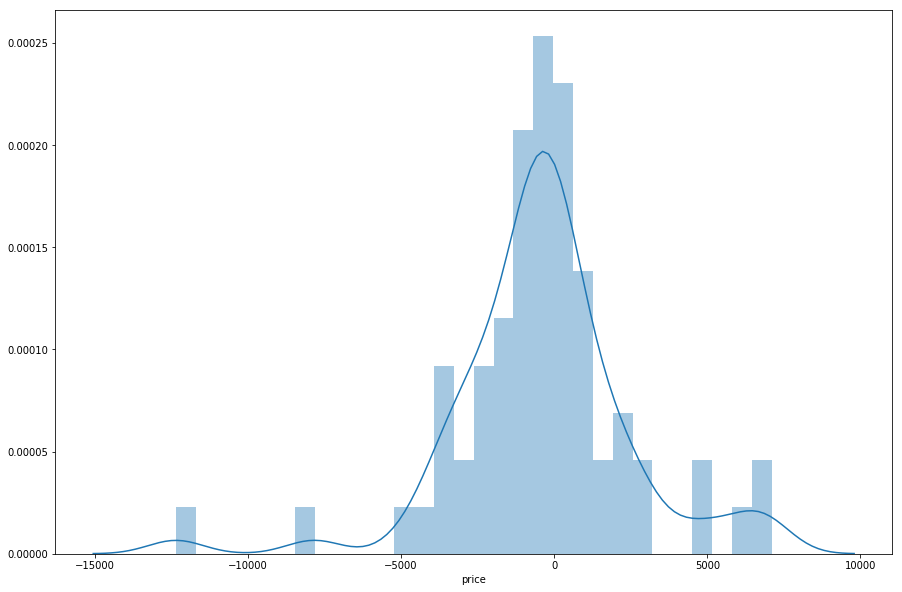

In [87]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [88]:
metrics.r2_score(y_train,r.predict(x1))

0.8805721446796957

In [89]:
metrics.r2_score(y_test,pred)

0.8082583755471866